## 1.Import data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# adjust display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# load the dataset (adjust path as needed)
df = pd.read_csv('./amazon_product_dataset/Amazon-Products.csv')  # or the correct filename
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551585 entries, 0 to 551584
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Unnamed: 0      551585 non-null  int64 
 1   name            551585 non-null  object
 2   main_category   551585 non-null  object
 3   sub_category    551585 non-null  object
 4   image           551585 non-null  object
 5   link            551585 non-null  object
 6   ratings         375791 non-null  object
 7   no_of_ratings   375791 non-null  object
 8   discount_price  490422 non-null  object
 9   actual_price    533772 non-null  object
dtypes: int64(1), object(9)
memory usage: 42.1+ MB


## 2.Data exploration

In [2]:
df.isnull().sum().sort_values(ascending=False)

ratings           175794
no_of_ratings     175794
discount_price     61163
actual_price       17813
name                   0
Unnamed: 0             0
link                   0
image                  0
sub_category           0
main_category          0
dtype: int64

In [3]:
# unique categories
print('Unique categories:', df['main_category'].nunique())
print(df['main_category'].value_counts())

Unique categories: 20
main_category
accessories                116141
men's clothing              76656
women's clothing            76512
tv, audio & cameras         68659
men's shoes                 57456
appliances                  33096
stores                      32903
home & kitchen              14568
kids' fashion               13488
sports & fitness            12648
bags & luggage              10416
beauty & health             10122
car & motorbike              7080
toys & baby products         6216
women's shoes                5472
industrial supplies          4104
grocery & gourmet foods      3312
pet supplies                 1632
music                        1080
home, kitchen, pets            24
Name: count, dtype: int64


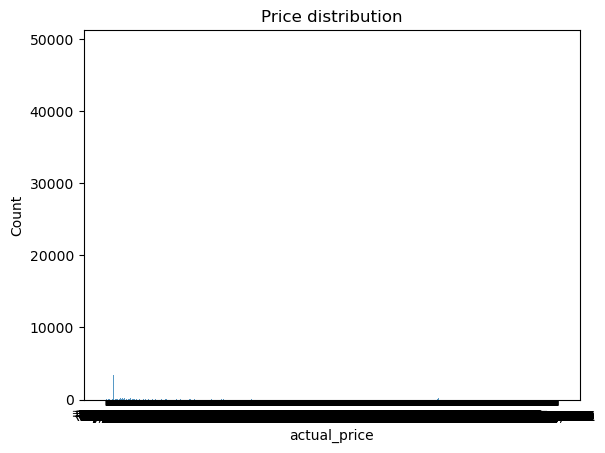

In [4]:
# distribution of price
sns.histplot(df['actual_price'].dropna(), bins=50)
plt.title('Price distribution')
plt.show()

## 3.Cleaning step

## 3.1.Remove Unnamed column

In [5]:
# remove Unnamed column
df = df.drop(columns=['Unnamed: 0'])

## 3.2.Clean up prices columns

In [6]:
# Remove currency symbols and commas
for col in ['discount_price', 'actual_price']:
    df[col] = df[col].replace('[₹,]', '', regex=True).astype(float)
df[['discount_price', 'actual_price']].head()

,discount_price,actual_price
0,32999.0,58990.0
1,46490.0,75990.0
2,34490.0,61990.0
3,37990.0,68990.0
4,34490.0,67790.0


## 3.3.Clean ratings and no_of_ratings

### ratings

In [7]:
df['ratings'].head(10)

0    4.2
1    4.2
2    4.2
3    4.0
4    4.1
5    4.0
6    4.2
7    4.3
8    4.1
9    4.0
Name: ratings, dtype: object

In [8]:
df['ratings'].describe()

count     375791
unique        49
top          4.0
freq       36609
Name: ratings, dtype: object

In [9]:
# Convert ratings to float
df['ratings'] = df['ratings'].astype(str).str.extract(r'(\d+\.?\d*)')[0].astype(float)
df['ratings'].describe()

count    369582.000000
mean          3.837409
std           1.010237
min           1.000000
25%           3.500000
50%           3.900000
75%           4.300000
max         100.000000
Name: ratings, dtype: float64

### no_of_ratings

In [10]:
# Convert no_of_ratings to numeric
df['no_of_ratings'] = (
    df['no_of_ratings']
    .astype(str)
    .str.extract(r'(\d+(?:,\d+)*)')[0]   # get sequences of digits (optionally with commas)
    .str.replace(',', '', regex=True)    # remove commas in large numbers
)
df['no_of_ratings'].describe()


count     372495
unique      8284
top            1
freq       40875
Name: no_of_ratings, dtype: object

In [11]:
df[['no_of_ratings']].head(10)

,no_of_ratings
0,2255
1,2948
2,1206
3,69
4,630
5,1666
6,1097
7,1494
8,674
9,801


In [12]:
df['no_of_ratings'].describe()

count     372495
unique      8284
top            1
freq       40875
Name: no_of_ratings, dtype: object

In [13]:
# Count missing (NaN) values
missing_count = df['no_of_ratings'].isna().sum()

# Count rows where no_of_ratings == 0
zero_count = (df['no_of_ratings'] == 0).sum()

# Total rows
total_rows = len(df)

print(f"Total rows: {total_rows:,}")
print(f"Missing no_of_ratings: {missing_count:,}")
print(f"No_of_ratings == 0: {zero_count:,}")
print(f"Percentage missing: {missing_count/total_rows:.2%}")
print(f"Percentage equal to 0: {zero_count/total_rows:.2%}")

Total rows: 551,585
Missing no_of_ratings: 179,090
No_of_ratings == 0: 0
Percentage missing: 32.47%
Percentage equal to 0: 0.00%


## 3.4.Remove products with 0 or negative prices

In [14]:
df = df[(df['actual_price'] > 0) & (df['ratings'] <= 5)]

## 3.5.Checks result cleaning

In [15]:
print(df['main_category'].value_counts().head(20))

main_category
accessories                66112
women's clothing           63602
tv, audio & cameras        48531
men's clothing             40906
men's shoes                28134
stores                     27957
appliances                 26499
home & kitchen             13204
sports & fitness            8698
beauty & health             7644
kids' fashion               6251
car & motorbike             5616
toys & baby products        5212
bags & luggage              3591
grocery & gourmet foods     2998
industrial supplies         2814
women's shoes               2785
pet supplies                1410
music                        819
home, kitchen, pets           13
Name: count, dtype: int64


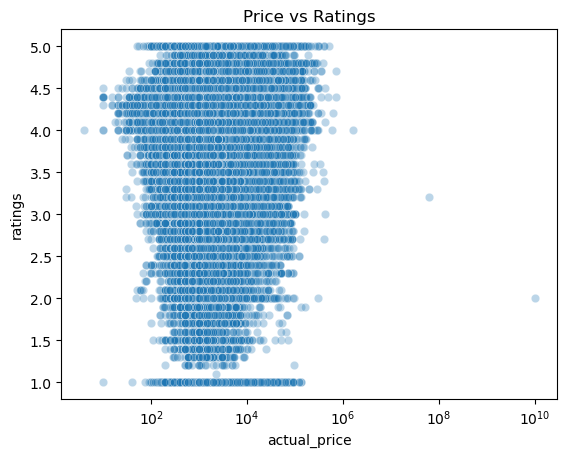

In [16]:
sns.scatterplot(data=df, x='actual_price', y='ratings', alpha=0.3)
plt.xscale('log')
plt.title('Price vs Ratings')
plt.show()


## 3.6.Save the cleaned data

In [17]:
df.to_csv('./cleaned_dataset/amazon_products_cleaned.csv', index=False)